# Importing Libraries For The Assignment

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Datasets

In [9]:
hist_data=pd.read_csv("historical_data.csv",encoding='Latin-1')
# I used Encoding is latin 1 to read the specical character properly

In [11]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [15]:
print(hist_data.shape)

(211224, 16)


#### From above I can clearly see that:
#### 1.side and direction is duplicate I can remove them 
#### 2.Timestamp IST and Timestamp both the comman and Since Timestamp Ist has more data and clear so I will Only take TimestampIst
#### 3.I don't need Order ID,Trade ID,orTransaction because they are just unique identifiers used for internal tracking of trades.
#### They don't contribute to understanding trader performance or market sentiment.
#### 4.The Crossed column shows how the trade was executed (market vs limit). Since it doesn't relate to profit/loss or market sentiment, 
#### it's not useful for our analysis and can be removed.

In [18]:
hist_data.drop(columns=['Direction', 'Timestamp', 'Order ID', 'Trade ID', 'Transaction Hash', 'Crossed'], inplace=True)

In [20]:
hist_data.shape

(211224, 10)

In [22]:
hist_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,-20.2566,0.042080
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,-112.5773,0.233863
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,-22.4402,0.046616
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,-190.7894,0.396337
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,-53.9063,0.111982


In [24]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,0.0,0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,0.0,0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,0.0,0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,0.0,0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,0.0,0.003055


In [26]:
# From Here I have seen COIN somewhere coin name and Somewhere @107 

In [223]:
# print(hist_data['Coin'].unique())

In [30]:
# Some unknown coin may be there SO I should choose to replace that with Nan that keeps my dataset clean and honest.

In [32]:
hist_data['Coin']=hist_data['Coin'].apply(lambda x: x if not str(x).startswith('@') else np.nan)

In [34]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,0.0,0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,0.0,0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,0.0,0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,0.0,0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,0.0,0.003055


In [37]:
# By  looking not nan and nan I will prefer to take value with nan and dont drop the row for this time 

In [39]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Account          211224 non-null  object 
 1   Coin             177238 non-null  object 
 2   Execution Price  211224 non-null  float64
 3   Size Tokens      211224 non-null  float64
 4   Size USD         211224 non-null  float64
 5   Side             211224 non-null  object 
 6   Timestamp IST    211224 non-null  object 
 7   Start Position   211224 non-null  float64
 8   Closed PnL       211224 non-null  float64
 9   Fee              211224 non-null  float64
dtypes: float64(6), object(4)
memory usage: 16.1+ MB


In [41]:
hist_data['Coin'].fillna('Unknown')

0          Unknown
1          Unknown
2          Unknown
3          Unknown
4          Unknown
            ...   
211219    FARTCOIN
211220    FARTCOIN
211221    FARTCOIN
211222    FARTCOIN
211223    FARTCOIN
Name: Coin, Length: 211224, dtype: object

In [63]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             177238 non-null  category      
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  category      
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Closed PnL       211224 non-null  float64       
 9   Fee              211224 non-null  float64       
 10  Date             211224 non-null  object        
 11  Hour             211224 non-null  int32         
 12  Dayofweek        211224 non-null  int32         
 13  Month            211224 non-null  int32         
 14  Year             211

#### Now I will do:
#### 1. Convert 'Timestamp IST' to datetime for time-based analysis.
#### 2. Ensured key numeric columns have no NaNs.(Are used in mathematical analysis or modeling)
#### 3.Confirmed data types are correct for analysis.

In [67]:
hist_data['Timestamp IST']=pd.to_datetime(hist_data['Timestamp IST'],dayfirst=True)

In [69]:
hist_data[['Execution Price','Size USD','Closed PnL']].isnull().sum()

Execution Price    0
Size USD           0
Closed PnL         0
dtype: int64

In [71]:
hist_data.dtypes

Account                    object
Coin                     category
Execution Price           float64
Size Tokens               float64
Size USD                  float64
Side                     category
Timestamp IST      datetime64[ns]
Start Position            float64
Closed PnL                float64
Fee                       float64
Date                       object
Hour                        int32
Dayofweek                   int32
Month                       int32
Year                        int32
dtype: object

#### """Looking above datasets I like to convert coin in category and side also,
#### because these help in Memory Management and Grouping faster """

In [73]:
hist_data['Coin']=hist_data['Coin'].astype('category')
hist_data['Side']=hist_data['Side'].astype('category')

In [75]:
hist_data.dtypes[['Coin','Side']]

Coin    category
Side    category
dtype: object

In [77]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee,Date,Hour,Dayofweek,Month,Year
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,0.0,0.345404,2024-12-02,22,0,12,2024
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,0.0,0.005600,2024-12-02,22,0,12,2024
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,0.0,0.050431,2024-12-02,22,0,12,2024
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,0.0,0.050043,2024-12-02,22,0,12,2024
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,0.0,0.003055,2024-12-02,22,0,12,2024


#### Extracting time-based features (Date, Hour, Day, etc.) helps analyze trading behavior over time,detect patterns (e.g. best trading hours/days), and support time-series analysis.

In [79]:
hist_data['Date']=hist_data['Timestamp IST'].dt.date
hist_data['Hour'] = hist_data['Timestamp IST'].dt.hour
hist_data['Dayofweek'] = hist_data['Timestamp IST'].dt.dayofweek
hist_data['Month'] = hist_data['Timestamp IST'].dt.month
hist_data['Year'] = hist_data['Timestamp IST'].dt.year

In [81]:
hist_data['Dayofweek'].unique()

array([0, 1, 2, 3, 5, 4, 6])

In [83]:
hist_data['Date'].nunique()
hist_data['Date'].min(), hist_data['Date'].max()

(datetime.date(2023, 5, 1), datetime.date(2025, 5, 1))

In [85]:
# I can see that data spans is 2 years and covers aal the day os weeks

In [87]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee,Date,Hour,Dayofweek,Month,Year
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,0.0,0.345404,2024-12-02,22,0,12,2024
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,0.0,0.005600,2024-12-02,22,0,12,2024
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,0.0,0.050431,2024-12-02,22,0,12,2024
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,0.0,0.050043,2024-12-02,22,0,12,2024
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,0.0,0.003055,2024-12-02,22,0,12,2024


### Dropping 'Timestamp IST' since its components(Date, Hour, Month, Year, Dayofweek) 
### have been extracted and cover all time-based analysis needs.


In [89]:
hist_data.drop(columns=['Timestamp IST'],inplace=True)

In [91]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Account          211224 non-null  object  
 1   Coin             177238 non-null  category
 2   Execution Price  211224 non-null  float64 
 3   Size Tokens      211224 non-null  float64 
 4   Size USD         211224 non-null  float64 
 5   Side             211224 non-null  category
 6   Start Position   211224 non-null  float64 
 7   Closed PnL       211224 non-null  float64 
 8   Fee              211224 non-null  float64 
 9   Date             211224 non-null  object  
 10  Hour             211224 non-null  int32   
 11  Dayofweek        211224 non-null  int32   
 12  Month            211224 non-null  int32   
 13  Year             211224 non-null  int32   
dtypes: category(2), float64(6), int32(4), object(2)
memory usage: 16.7+ MB


In [93]:
hist_data['Date'] = pd.to_datetime(hist_data['Date'])

In [95]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             177238 non-null  category      
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  category      
 6   Start Position   211224 non-null  float64       
 7   Closed PnL       211224 non-null  float64       
 8   Fee              211224 non-null  float64       
 9   Date             211224 non-null  datetime64[ns]
 10  Hour             211224 non-null  int32         
 11  Dayofweek        211224 non-null  int32         
 12  Month            211224 non-null  int32         
 13  Year             211224 non-null  int32         
dtypes: category(2), date

# Let’s start by looking at the descriptive statistics of the dataset

In [98]:
hist_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,Date,Hour,Dayofweek,Month,Year
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211224,211224.000000,211224.000000,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,2025-01-30 23:54:28.674013952,11.680013,2.596954,4.530158,2024.748206
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,2023-05-01 00:00:00,0.000000,0.000000,1.000000,2023.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,2024-12-31 00:00:00,5.000000,1.000000,2.000000,2024.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,2025-02-24 00:00:00,12.000000,2.000000,3.000000,2025.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,2025-04-02 00:00:00,19.000000,4.000000,4.000000,2025.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,2025-05-01 00:00:00,23.000000,6.000000,12.000000,2025.000000
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,NaN,7.363057,1.888613,3.585730,0.437781


In [100]:
# Before Visulizing Individual I would clean sentiments data then merge then visualize

# Fear_Greed Data cleaning

In [103]:
senti_data=pd.read_csv("fear_greed_index.csv",encoding='Latin-1')

In [105]:
senti_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [107]:
senti_data.shape

(2644, 4)

In [109]:
senti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [111]:
# Since Date is already there and Timestamp is not need.can be redundant

In [113]:
senti_data=senti_data.drop(columns='timestamp')

In [115]:
senti_data['date']=pd.to_datetime(senti_data['date'])

In [117]:
senti_data.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [119]:
# Create sentiment indicators:
# - sentiment_binary: 0 for Fear/Extreme Fear, 1 for Greed/Extreme Greed (for binary classification)
# - sentiment_level: Ordinal scale from 0 to 3 to reflect increasing greed intensity
#   (0 = Extreme Fear, 1 = Fear, 2 = Greed, 3 = Extreme Greed)


In [121]:
# Binary: 0 = Fear/Extreme Fear, 1 = Greed/Extreme Greed
senti_data['sentiment_binary'] = senti_data['classification'].apply(lambda x: 1 if 'Greed' in x else 0)

# Ordinal level mapping
level_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Greed': 2,
    'Extreme Greed': 3
}
senti_data['sentiment_level'] = senti_data['classification'].map(level_map)


In [123]:
senti_data.head()

,value,classification,date,sentiment_binary,sentiment_level
0,30,Fear,2018-02-01,0,1.0
1,15,Extreme Fear,2018-02-02,0,0.0
2,40,Fear,2018-02-03,0,1.0
3,24,Extreme Fear,2018-02-04,0,0.0
4,11,Extreme Fear,2018-02-05,0,0.0


# Merge Both Data and Visualize the data

In [130]:
merge_data=hist_data.merge(senti_data,left_on='Date',right_on='date',how='left')

In [132]:
merge_data.to_csv('merged_data.csv', index=False)

In [133]:
merge_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,Fee,Date,Hour,Dayofweek,Month,Year,value,classification,date,sentiment_binary,sentiment_level
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9769,986.87,7872.16,BUY,0.000000,0.0,0.345404,2024-12-02,22,0,12,2024,80.0,Extreme Greed,2024-12-02,1.0,3.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9800,16.00,127.68,BUY,986.524596,0.0,0.005600,2024-12-02,22,0,12,2024,80.0,Extreme Greed,2024-12-02,1.0,3.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9855,144.09,1150.63,BUY,1002.518996,0.0,0.050431,2024-12-02,22,0,12,2024,80.0,Extreme Greed,2024-12-02,1.0,3.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9874,142.98,1142.04,BUY,1146.558564,0.0,0.050043,2024-12-02,22,0,12,2024,80.0,Extreme Greed,2024-12-02,1.0,3.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9894,8.73,69.75,BUY,1289.488521,0.0,0.003055,2024-12-02,22,0,12,2024,80.0,Extreme Greed,2024-12-02,1.0,3.0


In [134]:
merge_data['sentiment_binary'].isnull().sum()

6

In [138]:
(merge_data['Date'] == merge_data['date']).all()  #here some of date are missing so it shows the fasle 

False

In [140]:
merge_data[merge_data['Date'] != merge_data['date']][['Date', 'date']]

,Date,date
727,2024-10-26,NaT
728,2024-10-26,NaT
729,2024-10-26,NaT
730,2024-10-26,NaT
731,2024-10-26,NaT
732,2024-10-26,NaT


In [142]:
# Since some date dont found so get false I would drop the date column

In [144]:
merge_data.drop(columns='date', inplace=True)

In [146]:
# Remove Rows without sentiments

In [148]:
merge_data = merge_data.dropna(subset=['classification'])

In [150]:
merge_data['sentiment_binary'].isnull().sum()

0

In [152]:
merge_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,Fee,Date,Hour,Dayofweek,Month,Year,value,classification,sentiment_binary,sentiment_level
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9769,986.87,7872.16,BUY,0.000000,0.0,0.345404,2024-12-02,22,0,12,2024,80.0,Extreme Greed,1.0,3.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9800,16.00,127.68,BUY,986.524596,0.0,0.005600,2024-12-02,22,0,12,2024,80.0,Extreme Greed,1.0,3.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9855,144.09,1150.63,BUY,1002.518996,0.0,0.050431,2024-12-02,22,0,12,2024,80.0,Extreme Greed,1.0,3.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9874,142.98,1142.04,BUY,1146.558564,0.0,0.050043,2024-12-02,22,0,12,2024,80.0,Extreme Greed,1.0,3.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,NaN,7.9894,8.73,69.75,BUY,1289.488521,0.0,0.003055,2024-12-02,22,0,12,2024,80.0,Extreme Greed,1.0,3.0


# EDA 

# 1.UNIVARIANT ANALYSIS

# a.Closed Pnl to understand trader profit and losses

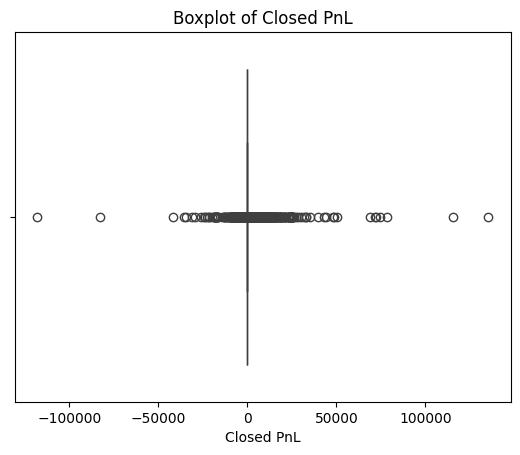

In [157]:
sns.boxplot(x=merge_data['Closed PnL'])
plt.title('Boxplot of Closed PnL')
plt.show()


### The boxplot shows that most trades result in small profits or losses, with breakeven being the most common outcome.
### A few extreme outliers with large gains or losses significantly affect the average.

# b.Fee-Understand how much fee traders usually pay.

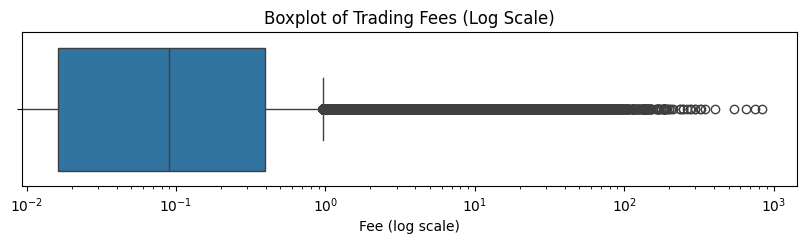

In [163]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=merge_data, x='Fee')
plt.xscale('log')
plt.title('Boxplot of Trading Fees (Log Scale)')
plt.xlabel('Fee (log scale)')
plt.show()

### The plot shows that most traders typically pay fees between approximately 0.01 and 1 units(Most traders pay low fees). However,
### some traders pay significantly higher fees, seen as outliers on the far right(outliers)

# c.Sentiment Level- market sentiment was distributed during the trading period.

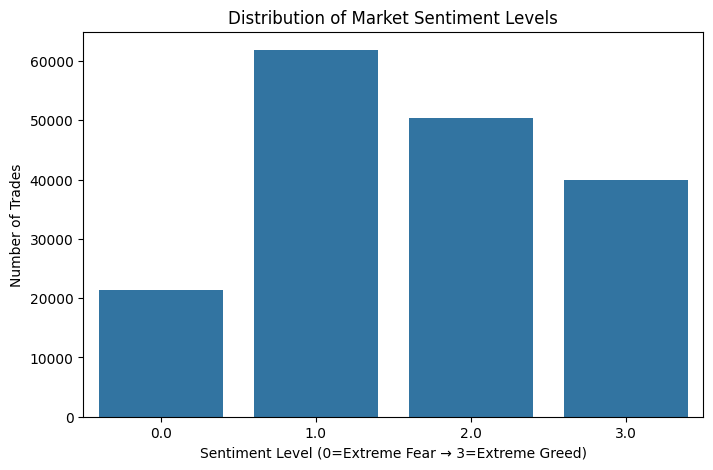

In [167]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merge_data, x='sentiment_level')
plt.title('Distribution of Market Sentiment Levels')
plt.xlabel('Sentiment Level (0=Extreme Fear → 3=Extreme Greed)')
plt.ylabel('Number of Trades')
plt.show()

### Most trading occurred when the market showed mild fear or was neutral, and people traded less during extreme fear.
### This could mean traders were cautious during high fear and more active when the sentiment improved.

# d.Classification

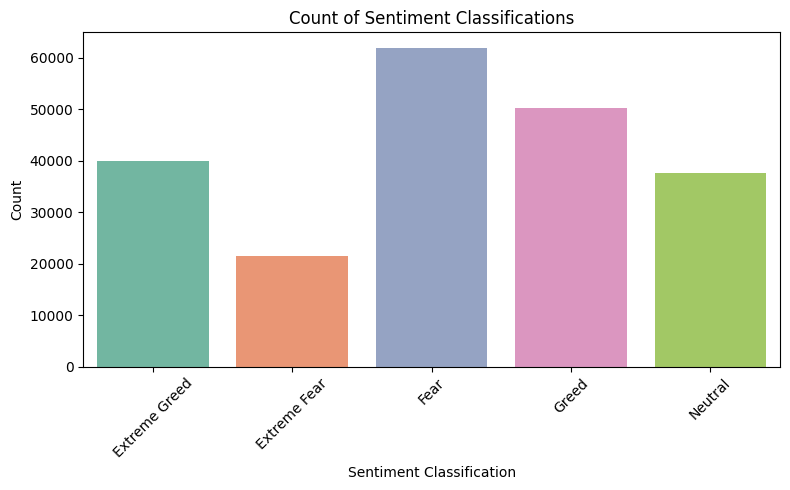

In [175]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merge_data, x='classification', hue='classification', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title('Count of Sentiment Classifications')
plt.xlabel('Sentiment Classification')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### This countplot suggest that during the trading period, negative sentiment (especially fear) dominated trader behavior.

# 2.Bivariate Analysis

# a. Closed PnL vs Sentiment Level (Boxplot)

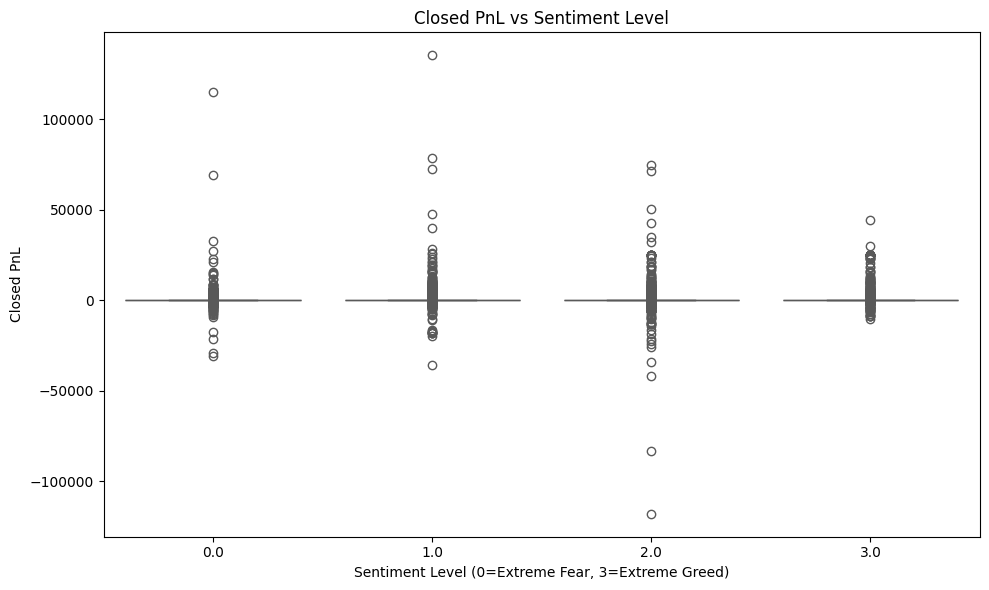

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_data, x='sentiment_level', y='Closed PnL', hue='sentiment_level', palette='Set2', legend=False)
plt.title('Closed PnL vs Sentiment Level')
plt.xlabel('Sentiment Level (0=Extreme Fear, 3=Extreme Greed)')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

### This suggests that market sentiment doesn't significantly impact trading profitability in this dataset.

# b.Size USD vs Sentiment Binary (Violin Plot)

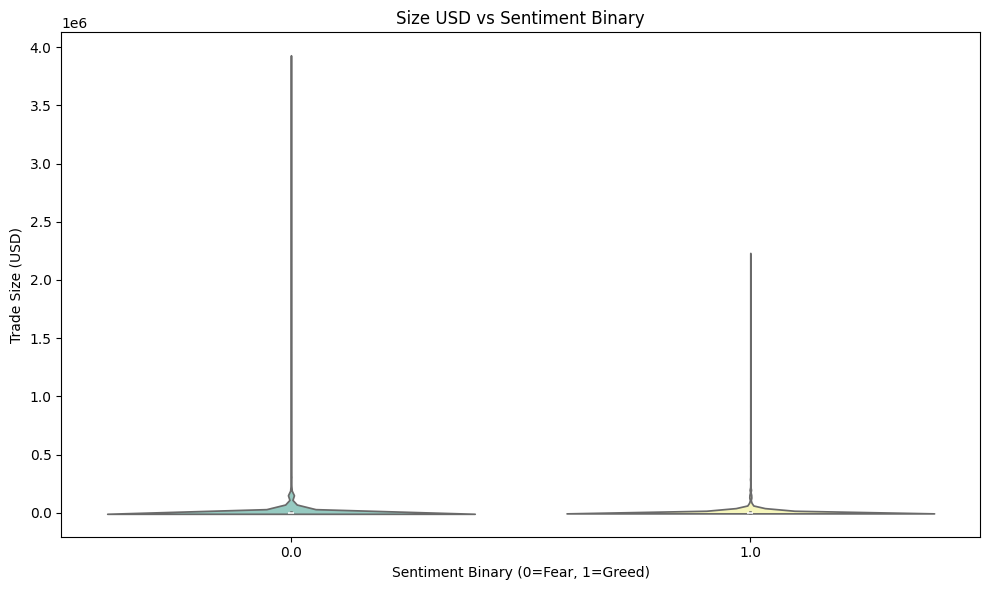

In [184]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merge_data, x='sentiment_binary', y='Size USD', hue='sentiment_binary', palette='Set3', legend=False)
plt.title('Size USD vs Sentiment Binary')
plt.xlabel('Sentiment Binary (0=Fear, 1=Greed)')
plt.ylabel('Trade Size (USD)')
plt.tight_layout()
plt.show()


### Traders might take larger and more varied positions in fearful conditions, possibly reflecting riskier or defensive strategies.

# c.Execution Price vs Value (Scatter Plot)

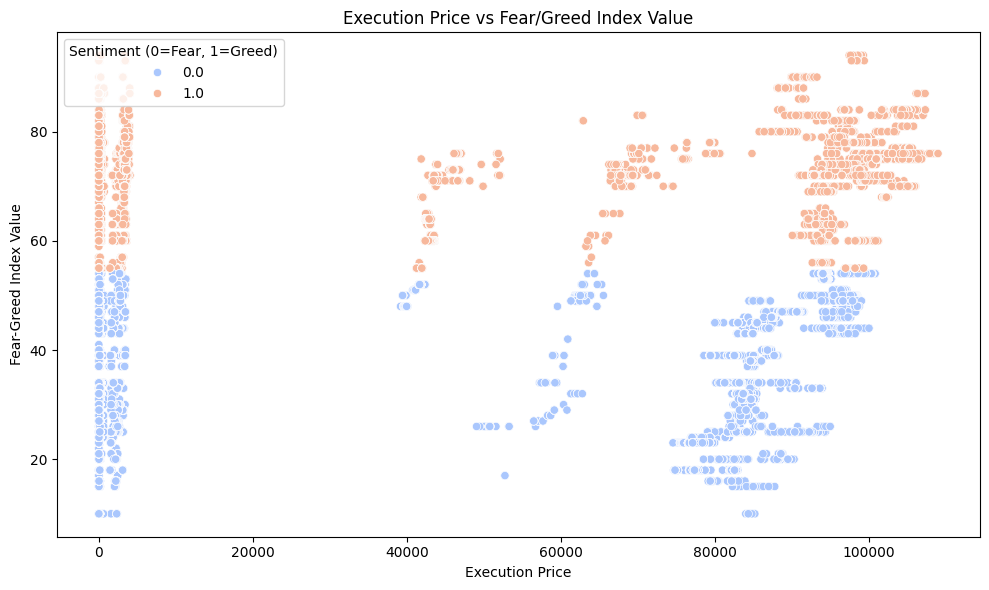

In [188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_data, x='Execution Price', y='value', hue='sentiment_binary', palette='coolwarm')
plt.title('Execution Price vs Fear/Greed Index Value')
plt.xlabel('Execution Price')
plt.ylabel('Fear-Greed Index Value')
plt.legend(title='Sentiment (0=Fear, 1=Greed)', loc='upper left')  # Set legend location manually
plt.tight_layout()
plt.show()

### The scatter plot shows that low index values align with fear (label 0) and high values with greed (label 1),
### confirming the index's strength in capturing market sentiment.

# 3.Multivariate

# a.Average PnL by Sentiment Level and Side (Grouped Bar Plot)

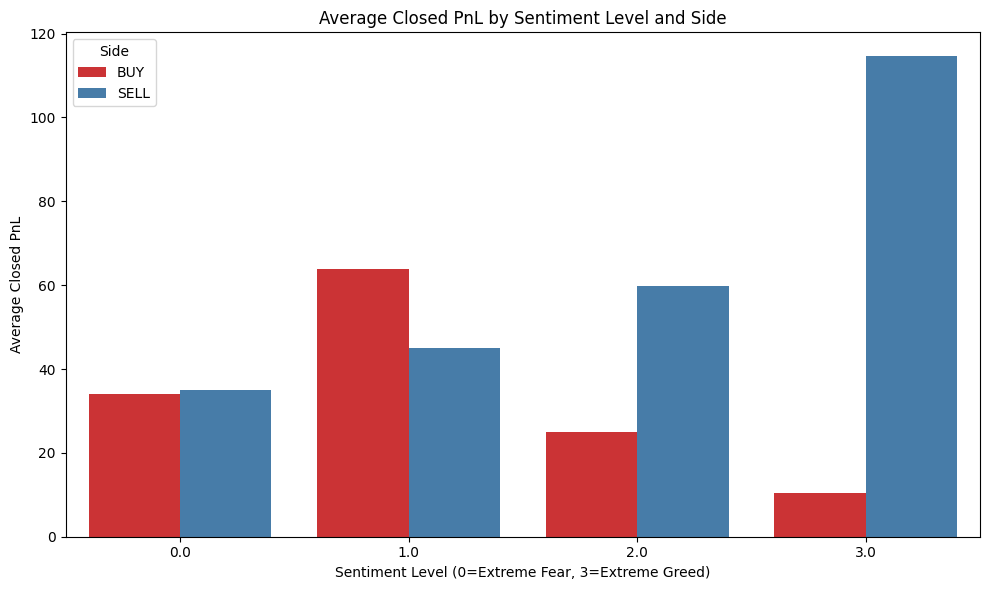

In [193]:
grouped_data = merge_data.groupby(['sentiment_level', 'Side'], observed=True)['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='sentiment_level', y='Closed PnL', hue='Side', palette='Set1')
plt.title('Average Closed PnL by Sentiment Level and Side')
plt.xlabel('Sentiment Level (0=Extreme Fear, 3=Extreme Greed)')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()

### SELL trades gain more as sentiment shifts to greed, while BUY trades decline—suggesting SELL performs better in greedy markets.

# b.Heatmap: Hour vs Sentiment Level vs Avg PnL

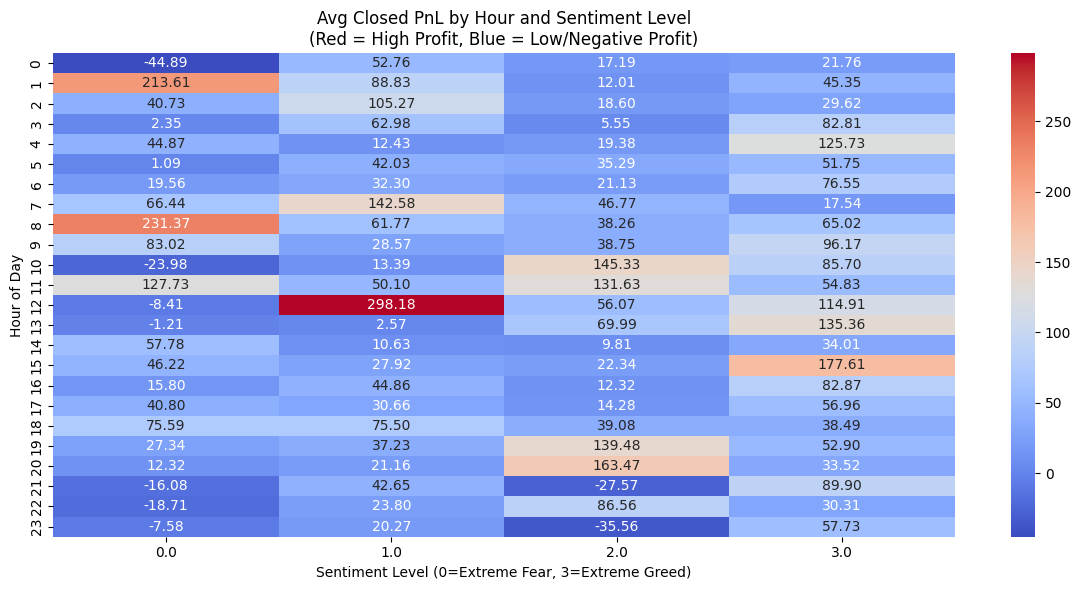

In [198]:
pivot_data = merge_data.pivot_table(values='Closed PnL', index='Hour', columns='sentiment_level', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Avg Closed PnL by Hour and Sentiment Level\n(Red = High Profit, Blue = Low/Negative Profit)')
plt.xlabel('Sentiment Level (0=Extreme Fear, 3=Extreme Greed)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()



### The heatmap shows that profit varies by time and sentiment. 
### Certain hours and sentiment levels (red areas) give higher profits, while others (blue) lead to losses

# c.Pivot Table: Closed PnL by Day of Week and Sentiment Level

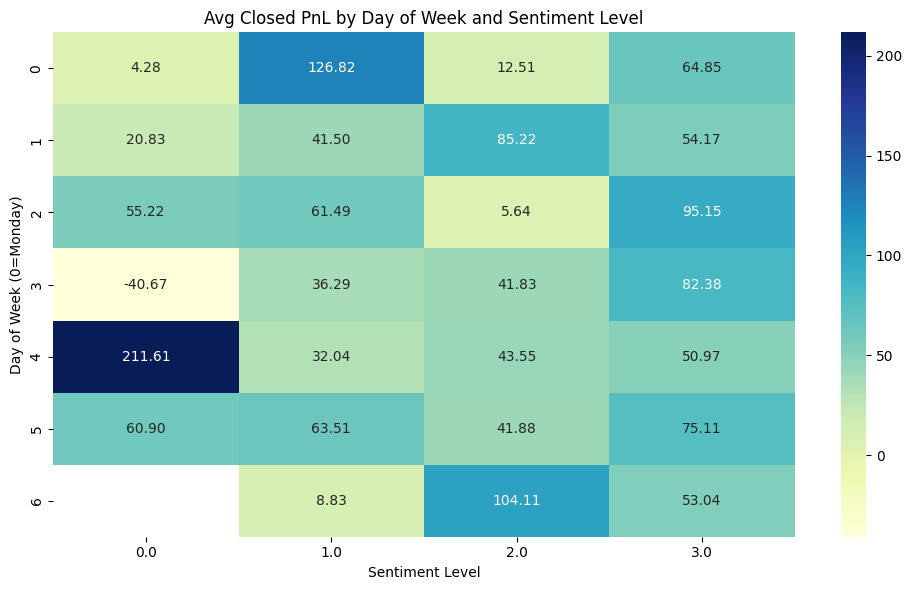

In [202]:
pivot_table = merge_data.pivot_table(values='Closed PnL', index='Dayofweek', columns='sentiment_level', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Avg Closed PnL by Day of Week and Sentiment Level')
plt.xlabel('Sentiment Level')
plt.ylabel('Day of Week (0=Monday)')
plt.tight_layout()
plt.show()


### The heatmap shows that average profit varies by day and sentiment level.
### Friday with low sentiment (extreme fear) gives the highest profit, while Thursday under the same sentiment shows a loss.
### Overall, some days perform better under specific market sentiments, helping identify the best trading conditions

# Time Series Line Plot: Average PnL over time by sentiment

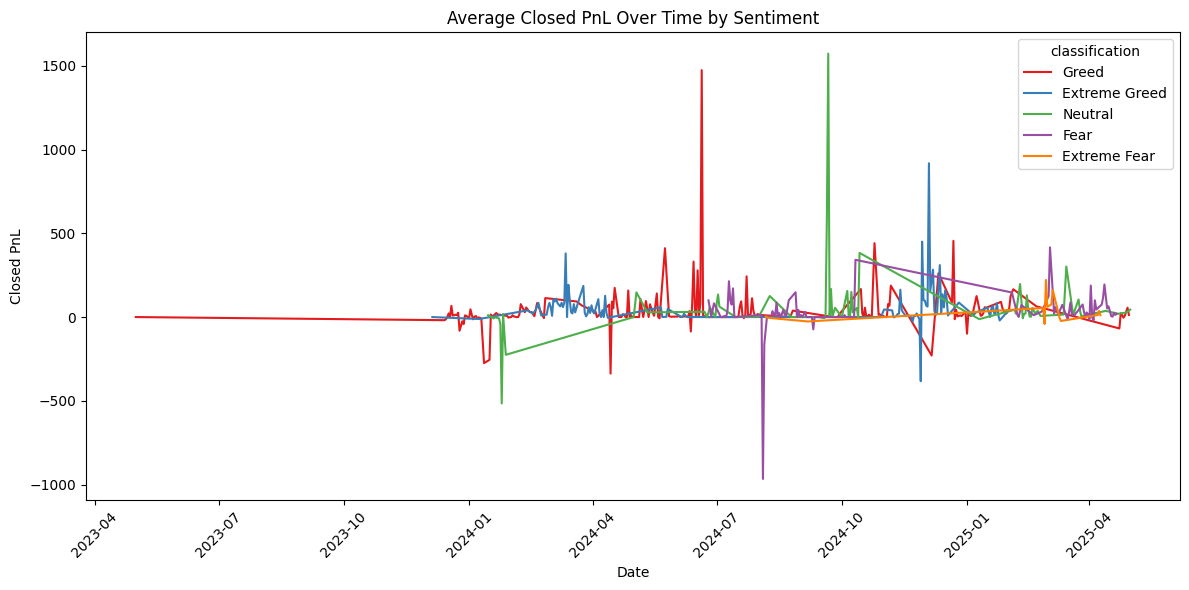

In [206]:
plt.figure(figsize=(12, 6))
avg_pnl_time = merge_data.groupby(['Date', 'classification'])['Closed PnL'].mean().reset_index()
sns.lineplot(data=avg_pnl_time, x='Date', y='Closed PnL', hue='classification', palette='Set1')
plt.title('Average Closed PnL Over Time by Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The plot shows PnL changes by sentiment over time. Greed leads to higher jumps (more risk/reward), 
### while Fear and Neutral show smaller, steadier PnL.

# Categorical Split: Sentiment vs Profitability

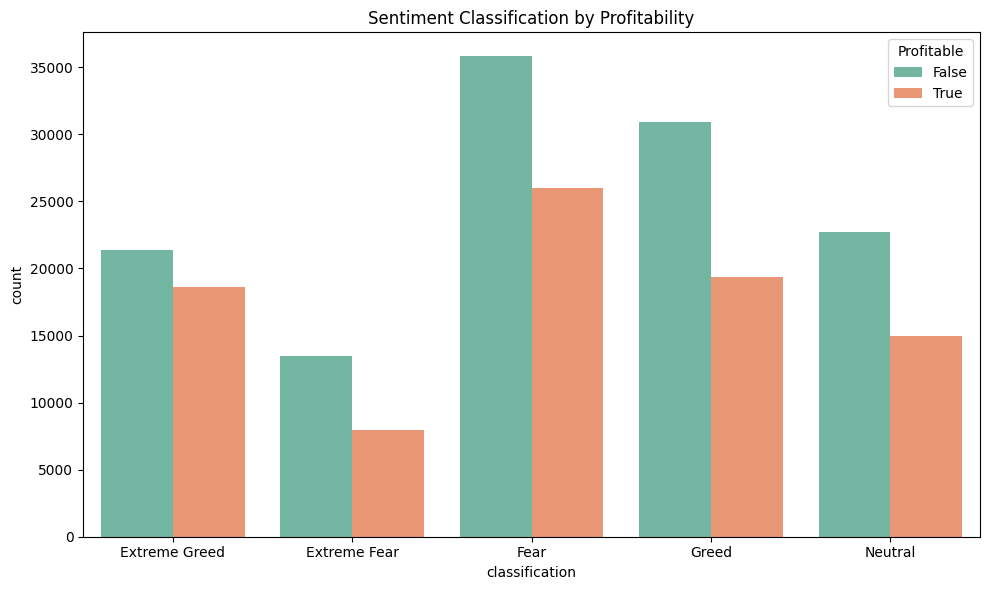

In [210]:
merge_data['Profitable'] = merge_data['Closed PnL'] > 0
plt.figure(figsize=(10, 6))
sns.countplot(data=merge_data, x='classification', hue='Profitable', palette='Set2')
plt.title('Sentiment Classification by Profitability')
plt.tight_layout()
plt.show()

### Fear sentiment leads to more trades, but not necessarily more profits

# Correlation Matrix

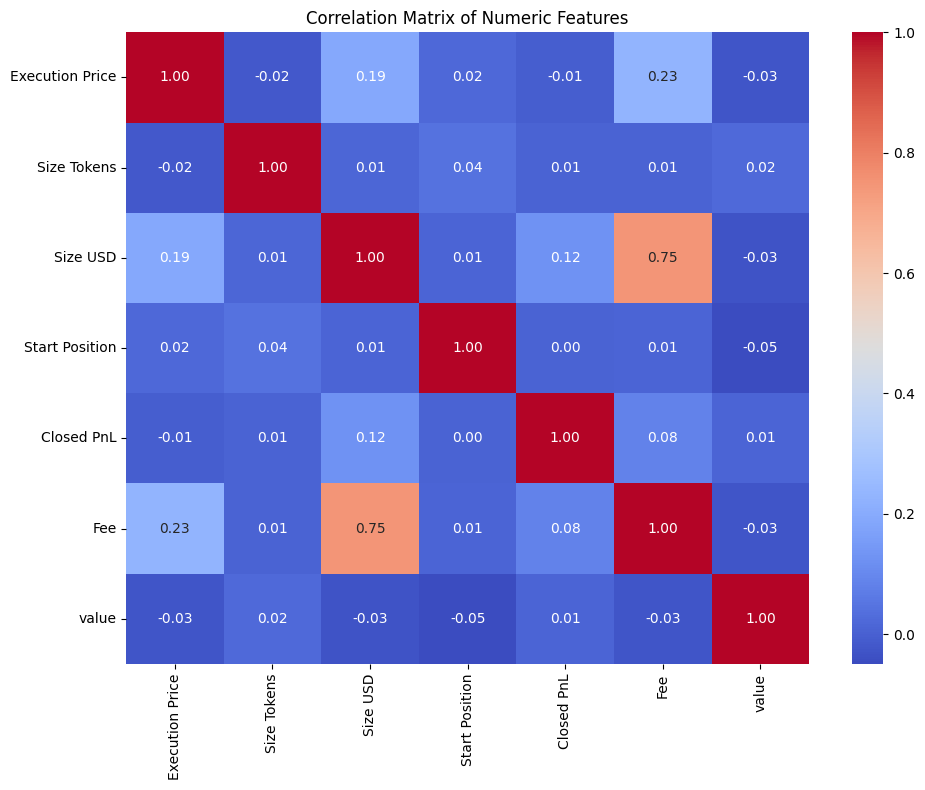

In [214]:
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee', 'value']
plt.figure(figsize=(10, 8))
sns.heatmap(merge_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

### Trade size and fees are closely linked. Other variables show weak or no clear relationship

## INSIGHT SUMMARY:

## 1.Market sentiment influences trading behavior but not always profitability.
## 2.Fear leads to more trades and diverse strategies, but not higher profits.
## 3.SELL strategies benefit from Greed, possibly due to overbought conditions.
## 4.Time-based factors (hour/day) matter greatly, especially in combination with sentiment.
## 5.Fear-Greed Index is a reliable sentiment metric, especially in classifying market mood.